In [68]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [32]:
gameboard = {key: "" for key in range(28)}
gameboard[0] = 'START'
gameboard[2] = ('Move forward 1', 1)
gameboard[9] = 'Red Mitten'
gameboard[11] = ('Move forwards 2', 2)
gameboard[14] = 'Blue Mitten'
gameboard[16] = ('Move back 1', -1)
gameboard[20] = ('Move ahead 2', 2)
gameboard[25] = 'Finish line!'

class kitty_ski_game:
    die = [1,2,3,'blue mitten', 'red mitten', 0]
    board = gameboard
    
    def __init__(self):
        self.kitties = {'Mona': 0, 'CatCat': 0}
        self.turn = 0
        self.winner = None
        
    def take_turn(self):
        
        #whose turn is it?
        cat = 'Mona' if self.turn % 2 == 0 else 'CatCat'
            
        #role
        role = random.choice(self.die)
        
        #move your cat
        if isinstance(role, int):
            self.kitties[cat] += role
        elif role == 'blue mitten':
            self.kitties[cat] = 14
        elif role == 'red mitten':
            self.kitties[cat] = 9
            
        #check your cat's square
        square_val = gameboard[self.kitties[cat]]
        if isinstance(square_val, tuple):
            self.kitties[cat] += square_val[1]
    
        #print(self.turn, cat, 'Roles:', role) 
        #print(' ', self.kitties)    
                
        #end game?
        if self.kitties[cat] >= 25:
            #print("Winner!!!! ")
            self.winner = cat
        else: self.turn += 1
k = kitty_ski_game()
for i in range(10):
    k.take_turn()

In [29]:
def play_kitty_ski_game():
    game = kitty_ski_game()
    while True:
        game.take_turn()
        if game.winner is not None:
            break
    result = {'turns': game.turn, 'winner': game.winner, 'score': game.kitties}
    return result

In [50]:
play_kitty_ski_game()

{'turns': 35, 'winner': 'CatCat', 'score': {'Mona': 9, 'CatCat': 26}}

In [89]:
turn_nums = []
for i in range(10000):
    game = play_kitty_ski_game()
    t = game['turns']
    turn_nums.append(t)

In [90]:
np.mean(turn_nums), np.median(turn_nums)

(69.0291, 52.0)

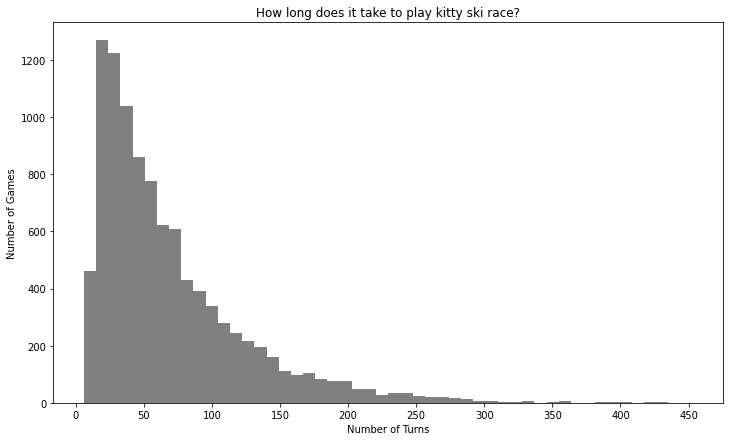

In [102]:
plt.figure(figsize=(12, 7))
plt.hist(turn_nums, bins=50,color='grey')
plt.xlabel('Number of Turns')
plt.ylabel('Number of Games')
plt.title('How long does it take to play kitty ski race?')
plt.xticks(range(0, 451, 50)) 
plt.show()